# Financial Inclusion in Africa Starter Notebook


In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load files into a pandas dataframe
train = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/Train.csv')
test = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/Test.csv')
ss = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/SampleSubmission.csv')
variables = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/SampleSubmission.csv')

In [4]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [46]:
train["index"]= train.index

In [47]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,index
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,3
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,4


In [5]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



Text(0.5, 3.1999999999999993, 'job_type')

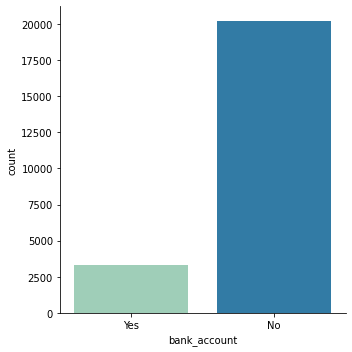

In [92]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train,  palette="YlGnBu")


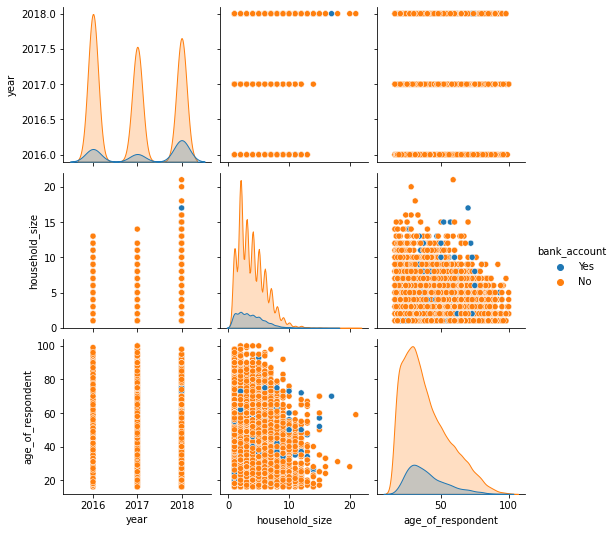

In [7]:
sns.pairplot(train, hue='bank_account')

In [8]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

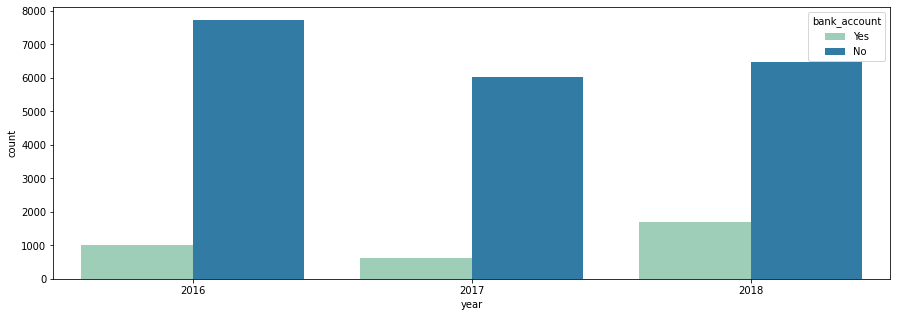

In [99]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='year',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0)
ax.legend(
    loc='best')

In [10]:
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

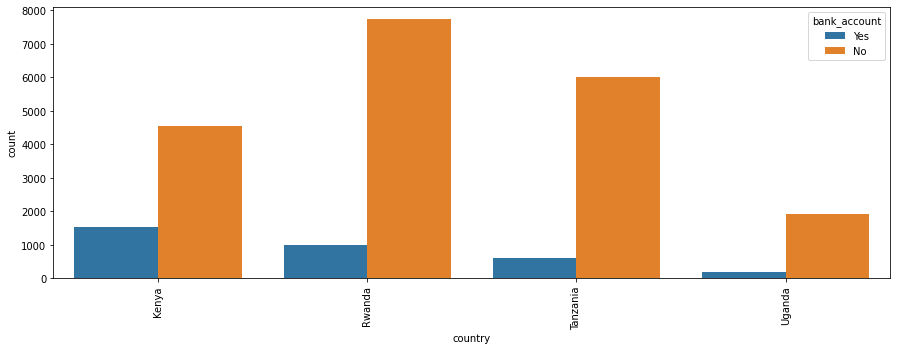

In [29]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='country',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [11]:
train.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [12]:
train.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

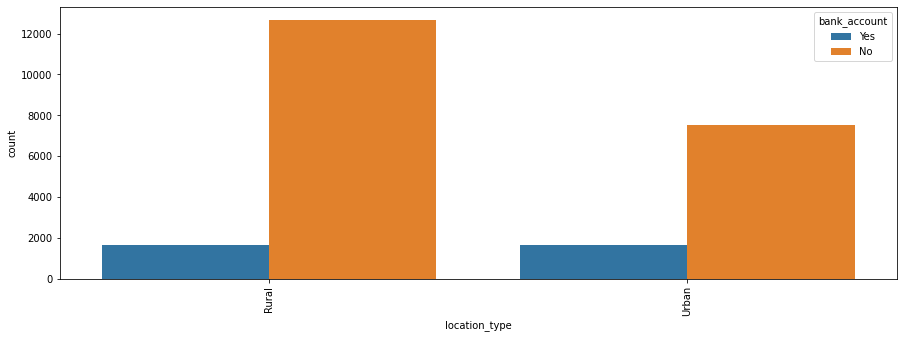

In [31]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='location_type',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [45]:
train.gender_of_respondent.value_counts()


Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

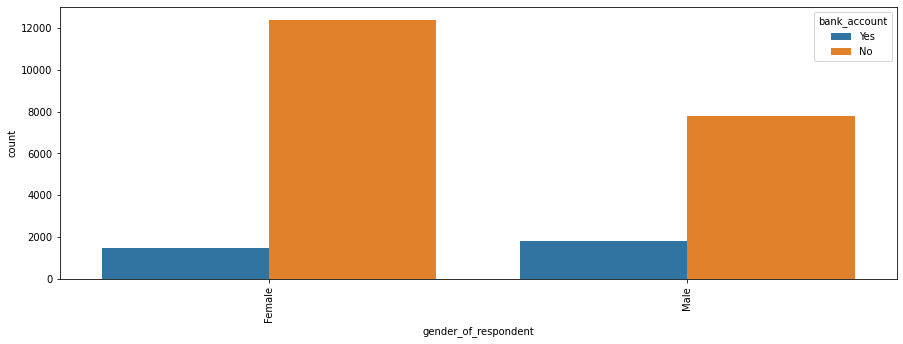

In [44]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='gender_of_respondent',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [13]:
train.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

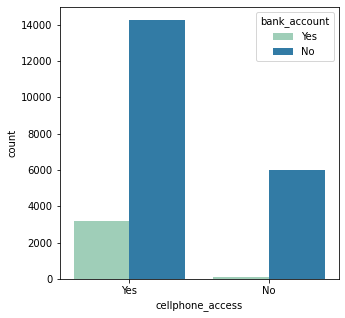

In [123]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x='cellphone_access',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0);

In [14]:
train.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

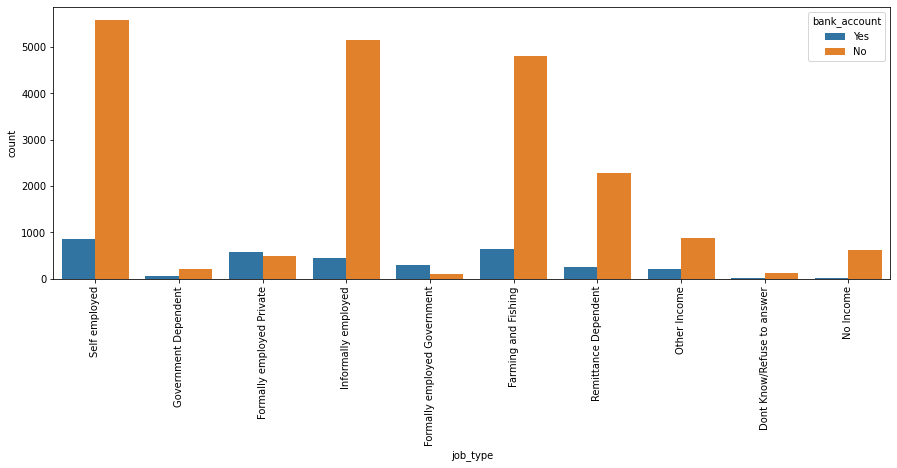

In [15]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='job_type',data=train,hue='bank_account')
plt.xticks(rotation=90);


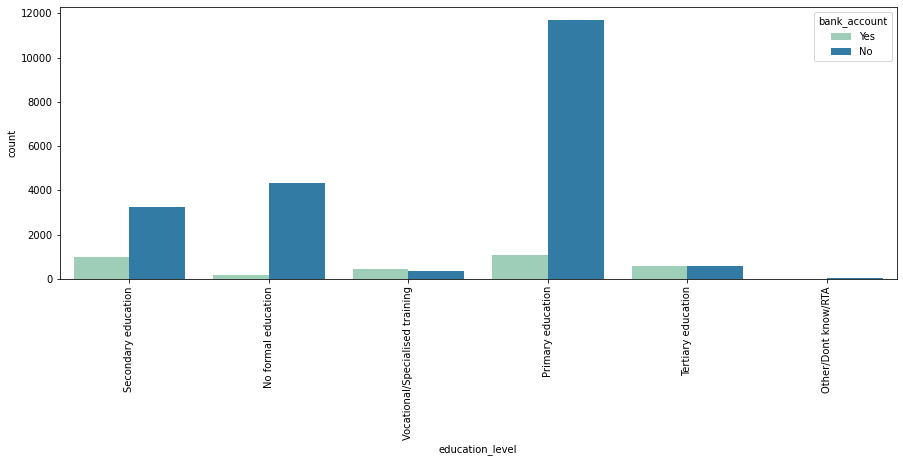

In [34]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='education_level',data=train,hue='bank_account', palette="YlGnBu" )
plt.xticks(rotation=90);

NameError: name 'Line2D' is not defined

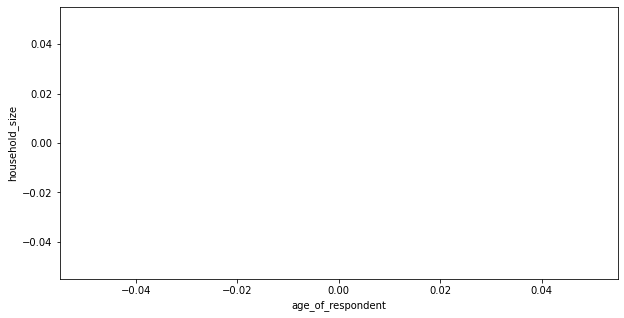

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(train[train["bank_account"]==1]["age_of_respondent"], train[train["bank_account"]==1]["household_size"], c="blue", alpha=0.5)
ax.scatter(train[train["bank_account"]==0]["age_of_respondent"], train[train["bank_account"]==0]["household_size"], c="green", alpha=0.5)

ax.set_xlabel("age_of_respondent")
ax.set_ylabel("household_size")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("bank account using by Age and houshold size ");

In [35]:
# correlation matrix between these variables

bank_ac_user = sns.train("bank_account")
bank_ac_user= bank_ac_user.pivot("country", "year", "bank_account")
ax = sns.heatmap()
#plt.figure(figsize = (14,12))
#ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

AttributeError: module 'seaborn' has no attribute 'train'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


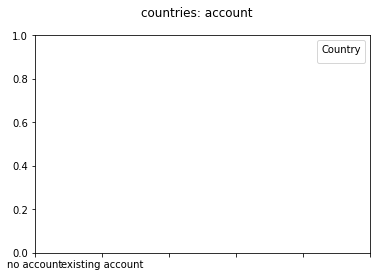

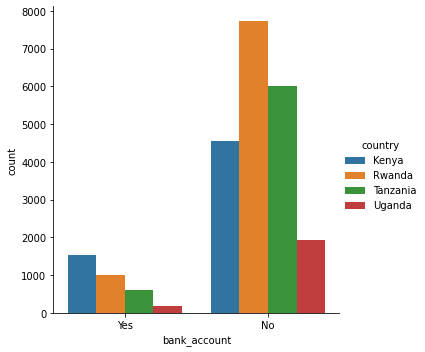

In [40]:
fig, ax = plt.subplots()

sns.catplot("bank_account", hue="country", data=train, kind="count",ax=ax)
          


ax.legend(title="Country")
ax.set_xticklabels(["no account", "existing account"])
ax.set_xlabel("")

fig.suptitle("countries: account");

nach geschlecht

In [100]:
# Create a dataframe with the counts by job type and user/non user
gender_counts_df = train.groupby(["gender_of_respondent", "bank_account"])["index"].count().unstack()
gender_counts_df

bank_account,No,Yes
gender_of_respondent,,
Female,12395,1482
Male,7817,1830


In [101]:
gender_user_percents_df = gender_counts_df.T.div(gender_counts_df.T.sum()).T
gender_user_percents_df

bank_account,No,Yes
gender_of_respondent,,
Female,0.893205,0.106795
Male,0.810304,0.189696


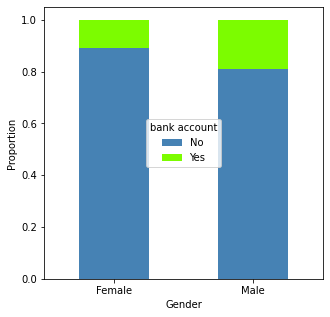

In [126]:
fig, ax = plt.subplots()
#plt.figure(figsize=(5,5))

gender_user_percents_df.plot(kind="bar", stacked=True, color=["steelblue", "lawngreen"],figsize=(5,5), ax=ax)

ax.set_xlabel("Gender")
ax.set_xticklabels(["Female", "Male"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(title="bank account",loc='center')

#fig.suptitle("gender")

nach job groups

In [61]:
# Create a dataframe with the counts by job type and user/non user
job_counts_df = train.groupby(["job_type", "bank_account"])["index"].count().unstack()
job_counts_df

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,112,14
Farming and Fishing,4806,635
Formally employed Government,87,300
Formally employed Private,484,571
Government Dependent,197,50
Informally employed,5152,445
No Income,614,13
Other Income,884,196
Remittance Dependent,2287,240


In [63]:
# Use the same counts df, adding up to 1
job_user_percents_df = job_counts_df.T.div(job_counts_df.T.sum()).T
job_user_percents_df

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,0.888889,0.111111
Farming and Fishing,0.883294,0.116706
Formally employed Government,0.224806,0.775194
Formally employed Private,0.458768,0.541232
Government Dependent,0.797571,0.202429
Informally employed,0.920493,0.079507
No Income,0.979266,0.020734
Other Income,0.818519,0.181481
Remittance Dependent,0.905026,0.094974


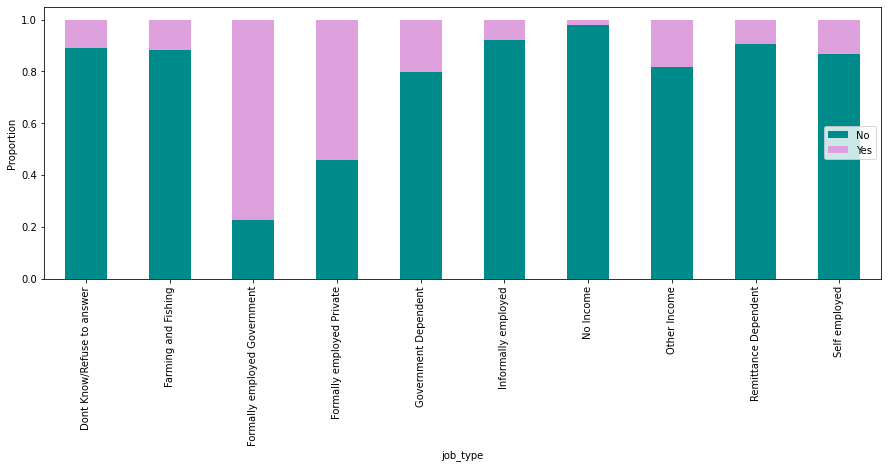

In [139]:
fig, ax = plt.subplots()

job_user_percents_df.plot(kind="bar", stacked=True, color=["darkcyan", "plum"], figsize=(15,5), ax=ax)

ax.set_xlabel("job_type")
ax.set_xticklabels(["Dont Know/Refuse to answer", "Farming and Fishing", "Formally employed Government",	
    "Formally employed Private", "Government Dependent", "Informally employed", "No Income", "Other Income",
    "Remittance Dependent", "Self employed"], rotation=90)
ax.set_ylabel("Proportion")

ax.legend(loc='center right')

#fig.suptitle("Job Types vs. bank account user/non user ");

nach countries

In [48]:
# Create a dataframe with the counts by job titel und bank account
counts_df = train.groupby(["country", "bank_account"])["index"].count().unstack()
counts_df

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


In [49]:
country_percents_df = counts_df.div(counts_df.sum()).T
country_percents_df

country,Kenya,Rwanda,Tanzania,Uganda
bank_account,,,,
No,0.224965,0.382545,0.297497,0.094993
Yes,0.459239,0.302838,0.183273,0.054650


In [51]:
# Use the same counts df, but now survived + did not survive add up to 1
user_percents_df = counts_df.T.div(counts_df.T.sum()).T
user_percents_df


bank_account,No,Yes
country,,
Kenya,0.749341,0.250659
Rwanda,0.885175,0.114825
Tanzania,0.908308,0.091692
Uganda,0.913851,0.086149


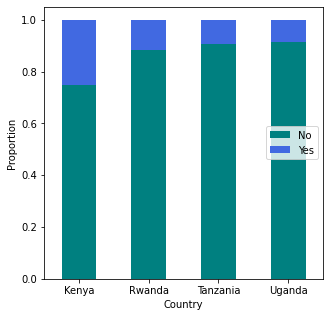

In [144]:
fig, ax = plt.subplots()

user_percents_df.plot(kind="bar", stacked=True, color=["teal", "royalblue"],figsize=(5,5), ax=ax)

ax.set_xlabel("Country")
ax.set_xticklabels(["Kenya", "Rwanda",	"Tanzania",	"Uganda"], rotation=0)
ax.set_ylabel("Proportion")

#color_patches = [
   # Patch(facecolor="blue", label="user"),
   # Patch(facecolor="green", label="non user")
#]
ax.legend(#handles=color_patches,
    loc='center right')

#fig.suptitle("Countries vs. bank account user ");

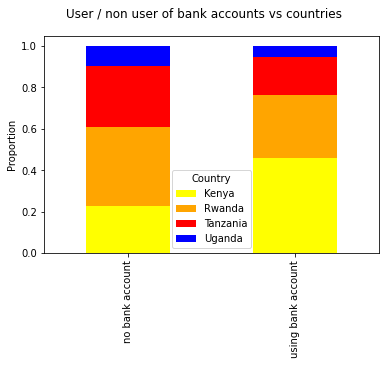

In [78]:
fig, ax = plt.subplots()

country_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "blue"], ax=ax)

ax.legend(title="Country")
ax.set_xticklabels(["no bank account", "using bank account"], rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("User / non user of bank accounts vs countries ");

nach education level

In [66]:
# Create a dataframe with the counts by education level und bank account
edu_counts_df = train.groupby(["education_level", "bank_account"])["index"].count().unstack()
edu_counts_df

bank_account,No,Yes
education_level,,
No formal education,4339,176
Other/Dont know/RTA,24,11
Primary education,11698,1093
Secondary education,3240,983
Tertiary education,566,591
Vocational/Specialised training,345,458


In [67]:
edu_percents_df = edu_counts_df.div(edu_counts_df.sum()).T
edu_percents_df

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
bank_account,,,,,,
No,0.214674,0.001187,0.578765,0.160301,0.028003,0.017069
Yes,0.053140,0.003321,0.330012,0.296800,0.178442,0.138285


Text(0, 0.5, 'Proportion')

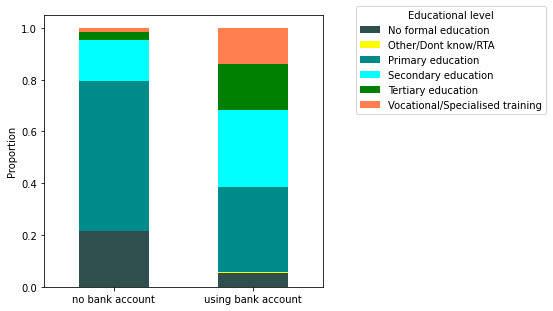

In [142]:
fig, ax = plt.subplots()

edu_percents_df.plot(kind="bar", stacked=True, color=["darkslategrey", "yellow", "darkcyan", "aqua", "green", "coral"],figsize=(5,5), ax=ax)


ax.legend(bbox_to_anchor=(1.1, 1.05), title="Educational level")
ax.set_xticklabels(["no bank account", "using bank account"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

#fig.suptitle("User/non user of bank accounts vs educational level ");

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [7]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [8]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [9]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [11]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Preprocess both train and test dataset.

In [12]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [13]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


Observe the shape of the train data.

In [14]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [15]:
import sklearn.model_selection

In [16]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

In [17]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier()

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [18]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11049723756906082


Let’s check the confusion matrix for XGB model.

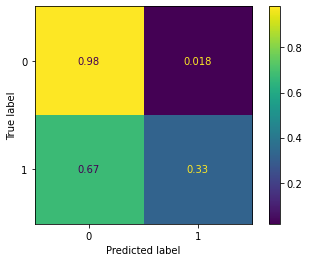

In [19]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 1, 'max_depth': 5, 'min_child_weighth': 1, 'subsample': 0.8}


The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.10837229069273269


Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [22]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [23]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [24]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
6062,uniqueid_12197 x Rwanda,0
2402,uniqueid_8471 x Kenya,1
4757,uniqueid_10892 x Rwanda,0
8590,uniqueid_8865 x Tanzania,0
3710,uniqueid_9845 x Rwanda,0


Save results in the CSV file.


In [25]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************